In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ase import Atoms
from dscribe.descriptors import SOAP, CoulombMatrix
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
from tqdm import tqdm

# Extract coords:

In [2]:
mpdr = MPDataRetrieval(api_key="3g9wMps4VR5Hy6Pm")
dfpg = mpdr.get_dataframe(
    criteria={
        "elements": {
            "$nin": [
                "Nb",
                "Mo",
                "Tc",
                "Ru",
                "Rh",
                "Pd",
                "Ag",
                "Cd",
                "In",
                "Sn",
                "Sb",
                "Te",
                "I",
                "Xe",
                "Cs",
                "Ba",
                "La",
                "Ce",
                "Pr",
                "Nd",
                "Pm",
                "Sm",
                "Eu",
                "Gd",
                "Tb",
                "Dy",
                "Ho",
                "Er",
                "Tm",
                "Yb",
                "Lu",
                "Hf",
                "Ta",
                "W",
                "Re",
                "Os",
                "Ir",
                "Pt",
                "Au",
                "Hg",
                "Tl",
                "Pb",
                "Bi",
                "Po",
                "At",
                "Rn",
                "Fr",
                "Ra",
                "Ac",
                "Th",
                "Pa",
                "U",
                "Np",
                "Pu",
                "Am",
                "Cm",
                "Bk",
                "Cf",
                "Es",
                "Fm",
                "Md",
                "No",
                "Lr",
                "Rf",
                "Db",
                "Sg",
                "Bh",
                "Hs",
                "Mt",
                "Ds",
                "Rg",
                "Cn",
                "Uut",
                "Fl",
                "Uup",
                "Lv",
                "Uus",
                "Uuo",
            ]
        }
    },
    properties=["band_gap", "formation_energy_per_atom"],
)

100%|███████████████████████████████████████████████████████████████████████████| 47932/47932 [00:55<00:00, 857.98it/s]


In [3]:
dfpg.shape

(47932, 2)

In [5]:
dfpg.to_csv("Materials_ene_gap.csv")

In [11]:
m = MPRester(api_key="3g9wMps4VR5Hy6Pm")

In [2]:
dictionnaireTabPeriodique = {
    "H": 1,
    "He": 2,
    "Li": 3,
    "Be": 4,
    "B": 5,
    "C": 6,
    "N": 7,
    "O": 8,
    "F": 9,
    "Ne": 10,
    "Na": 11,
    "Mg": 12,
    "Al": 13,
    "Si": 14,
    "P": 15,
    "S": 16,
    "Cl": 17,
    "Ar": 18,
    "K": 19,
    "Ca": 20,
    "Sc": 21,
    "Ti": 22,
    "V": 23,
    "Cr": 24,
    "Mn": 25,
    "Fe": 26,
    "Co": 27,
    "Ni": 28,
    "Cu": 29,
    "Zn": 30,
    "Ga": 31,
    "Ge": 32,
    "As": 33,
    "Se": 34,
    "Br": 35,
    "Kr": 36,
    "Rb": 37,
    "Sr": 38,
    "Y": 39,
    "Zr": 40,
    "Nb": 41,
    "Mo": 42,
    "Tc": 43,
    "Ru": 44,
    "Rh": 45,
    "Pd": 46,
    "Ag": 47,
    "Cd": 48,
    "In": 49,
    "Sn": 50,
    "Sb": 51,
    "Te": 52,
    "I": 53,
    "Xe": 54,
    "Cs": 55,
    "Ba": 56,
    "La": 57,
    "Ce": 58,
    "Pr": 59,
    "Nd": 60,
    "Pm": 61,
    "Sm": 62,
    "Eu": 63,
    "Gd": 64,
    "Tb": 65,
    "Dy": 66,
    "Ho": 67,
    "Er": 68,
    "Tm": 69,
    "Yb": 70,
    "Lu": 71,
    "Hf": 72,
    "Ta": 73,
    "W": 74,
    "Re": 75,
    "Os": 76,
    "Ir": 77,
    "Pt": 78,
    "Au": 79,
    "Hg": 80,
    "Tl": 81,
    "Pb": 82,
    "Bi": 83,
    "Po": 84,
    "At": 85,
    "Rn": 86,
    "Fr": 87,
    "Ra": 88,
    "Ac": 89,
    "Th": 90,
    "Pa": 91,
    "U": 92,
    "Np": 93,
    "Pu": 94,
    "Am": 95,
    "Cm": 96,
    "Bk": 97,
    "Cf": 98,
    "Es": 99,
    "Fm": 100,
    "Md": 101,
    "No": 102,
    "Lr": 103,
    "Rf": 104,
    "Db": 105,
    "Sg": 106,
    "Bh": 107,
    "Hs": 108,
    "Mt": 109,
    "Ds": 110,
    "Rg": 111,
    "Cn": 112,
    "Uut": 113,
    "Fl": 114,
    "Uup": 115,
    "Lv": 116,
    "Uus": 117,
    "Uuo": 118,
}

In [6]:
def CIF2Atom(cif):
    """
    Generates an atom object using the cif file downloaded from MaterialProject
    """
    blurp = CifParser.from_string(cif)
    blurpDict = blurp.as_dict()
    blurpDict = blurpDict.popitem()[1]
    # Cell
    in_cell = [
        float(blurpDict["_cell_length_a"]),
        float(blurpDict["_cell_length_b"]),
        float(blurpDict["_cell_length_c"]),
        float(blurpDict["_cell_angle_alpha"]),
        float(blurpDict["_cell_angle_beta"]),
        float(blurpDict["_cell_angle_gamma"]),
    ]

    # Numbers
    in_numbers = [
        dictionnaireTabPeriodique[i] for i in blurpDict["_atom_site_type_symbol"]
    ]

    # Positions
    tabX = np.array(blurpDict["_atom_site_fract_x"]).astype(float)
    tabY = np.array(blurpDict["_atom_site_fract_y"]).astype(float)
    tabZ = np.array(blurpDict["_atom_site_fract_z"]).astype(float)
    tabX = tabX.reshape((1, tabX.shape[0]))
    tabY = tabY.reshape((1, tabY.shape[0]))
    tabZ = tabZ.reshape((1, tabZ.shape[0]))
    in_positions = np.concatenate((tabX, tabY, tabZ), axis=0).transpose()
    return Atoms(
        cell=in_cell,
        numbers=in_numbers,
        scaled_positions=in_positions,
        pbc=[True, True, True],
    )

In [7]:
atoms = []
for ind in tqdm(dfpg.index):
    try:
        # On accède au cif
        data = m.query(criteria={"task_id": ind}, properties=["cif"])[0]
        cif = data["cif"]
        # On transforme les cif au objets atom
        atoms.append(CIF2Atom(cif))
    except:
        # En cas de problème, on enlève ce cif de la base de donnée
        print(ind)
        dfpg = dfpg.drop(ind)

 79%|█████████████████████████████████████████████████████████               | 38024/47932 [6:25:54<5:08:59,  1.87s/it]

mp-1176857


 84%|████████████████████████████████████████████████████████████▊           | 40494/47932 [6:59:47<6:32:26,  3.17s/it]

mp-867596
mp-867623
mp-867645


 84%|████████████████████████████████████████████████████████████▊           | 40498/47932 [6:59:47<2:13:16,  1.08s/it]

mp-867763
mp-867864
mp-867956


 84%|████████████████████████████████████████████████████████████▊           | 40500/47932 [6:59:47<1:27:48,  1.41it/s]

mp-971794
mp-973364
mp-1009127
mp-1009129


 85%|██████████████████████████████████████████████████████████████▌           | 40504/47932 [6:59:47<42:25,  2.92it/s]

mp-1018140
mp-1025126
mp-1063661
mp-1065577


 85%|██████████████████████████████████████████████████████████████▌           | 40508/47932 [6:59:48<23:21,  5.30it/s]

mp-1072984
mp-1072994
mp-1072996
mp-1073003
mp-1073012


 85%|██████████████████████████████████████████████████████████████▌           | 40514/47932 [6:59:48<12:01, 10.28it/s]

mp-1073015
mp-1073016
mp-1073021
mp-1073033
mp-1073037
mp-1073045
mp-1073065


 85%|██████████████████████████████████████████████████████████████▌           | 40522/47932 [6:59:48<06:36, 18.67it/s]

mp-1073075
mp-1073089
mp-1073114
mp-1073146
mp-1073154
mp-1073157
mp-1073164
mp-1073166


 85%|██████████████████████████████████████████████████████████████▌           | 40530/47932 [6:59:48<04:52, 25.31it/s]

mp-1073199
mp-1073201
mp-1073210
mp-1073254
mp-1073256
mp-1073274
mp-1073302
mp-1073304
mp-1073308


 85%|██████████████████████████████████████████████████████████████▌           | 40540/47932 [6:59:49<03:47, 32.43it/s]

mp-1073316
mp-1073318
mp-1073326
mp-1073330
mp-1073358
mp-1073362
mp-1073371
mp-1073396


 85%|██████████████████████████████████████████████████████████████▌           | 40548/47932 [6:59:49<03:38, 33.78it/s]

mp-1073409
mp-1073416
mp-1073428
mp-1073451
mp-1073454
mp-1073456
mp-1073459
mp-1073465


 85%|██████████████████████████████████████████████████████████████▌           | 40557/47932 [6:59:49<03:17, 37.29it/s]

mp-1073477
mp-1073481
mp-1073493
mp-1073495
mp-1073501
mp-1073522
mp-1073529
mp-1073530
mp-1073532


 85%|██████████████████████████████████████████████████████████████▋           | 40567/47932 [6:59:49<02:58, 41.31it/s]

mp-1073557
mp-1073562
mp-1073568
mp-1073586
mp-1073587
mp-1073590
mp-1073593
mp-1073594
mp-1073599


 85%|██████████████████████████████████████████████████████████████▋           | 40577/47932 [6:59:50<02:56, 41.72it/s]

mp-1073604
mp-1073613
mp-1073623
mp-1073638
mp-1073644
mp-1073655
mp-1073663
mp-1073672
mp-1073678
mp-1073686


 85%|██████████████████████████████████████████████████████████████▋           | 40587/47932 [6:59:50<02:52, 42.53it/s]

mp-1073702
mp-1073705
mp-1073728
mp-1073730
mp-1073733
mp-1073734
mp-1073735
mp-1073780
mp-1073789


 85%|██████████████████████████████████████████████████████████████▋           | 40597/47932 [6:59:50<02:51, 42.83it/s]

mp-1073795
mp-1073809
mp-1073812
mp-1073820
mp-1073851
mp-1073852
mp-1073857
mp-1073862
mp-1073864


 85%|██████████████████████████████████████████████████████████████▋           | 40602/47932 [6:59:50<02:51, 42.72it/s]

mp-1073876
mp-1073877
mp-1073903
mp-1073909
mp-1073910
mp-1073911
mp-1073917
mp-1073921
mp-1073927


 85%|██████████████████████████████████████████████████████████████▋           | 40612/47932 [6:59:50<02:55, 41.68it/s]

mp-1073934
mp-1073958
mp-1073962
mp-1074011
mp-1074028
mp-1074050
mp-1074061
mp-1074063
mp-1074093


 85%|██████████████████████████████████████████████████████████████▋           | 40622/47932 [6:59:51<02:51, 42.54it/s]

mp-1074094
mp-1074095
mp-1074106
mp-1074108
mp-1074123
mp-1074131
mp-1074141
mp-1074143
mp-1074145


 85%|██████████████████████████████████████████████████████████████▋           | 40627/47932 [6:59:51<02:54, 41.86it/s]

mp-1074174
mp-1074181
mp-1074192
mp-1074194
mp-1074199
mp-1074201
mp-1074203
mp-1074207


 85%|██████████████████████████████████████████████████████████████▋           | 40637/47932 [6:59:51<03:07, 38.92it/s]

mp-1074213
mp-1074228
mp-1074233
mp-1074259
mp-1074264
mp-1074265
mp-1074278
mp-1074283


 85%|██████████████████████████████████████████████████████████████▊           | 40647/47932 [6:59:51<02:58, 40.85it/s]

mp-1074287
mp-1074288
mp-1074307
mp-1074333
mp-1074345
mp-1074346
mp-1074347
mp-1074350
mp-1074375


 85%|██████████████████████████████████████████████████████████████▊           | 40657/47932 [6:59:51<02:53, 42.01it/s]

mp-1074380
mp-1074382
mp-1074404
mp-1074405
mp-1074417
mp-1074455
mp-1074465
mp-1074475
mp-1074483
mp-1074526


 85%|██████████████████████████████████████████████████████████████▊           | 40667/47932 [6:59:52<02:53, 41.93it/s]

mp-1074532
mp-1074538
mp-1074542
mp-1074545
mp-1074573
mp-1074587
mp-1074616
mp-1074619
mp-1074639


 85%|██████████████████████████████████████████████████████████████▊           | 40672/47932 [6:59:52<02:55, 41.47it/s]

mp-1074641
mp-1074652
mp-1074665
mp-1074672
mp-1074685
mp-1074714
mp-1074729
mp-1074730
mp-1074738


 85%|██████████████████████████████████████████████████████████████▊           | 40677/47932 [6:59:52<02:53, 41.88it/s]

mp-1074751
mp-1074772
mp-1074792


100%|██████████████████████████████████████████████████████████████████████████| 47932/47932 [8:18:11<00:00,  1.60it/s]


In [8]:
len(atoms)

47743

## Soap prediction:

In [4]:
# importer la liste des atomes si on a pas la base de données
# atoms = np.load('atoms.npy', allow_pickle=True)

In [5]:
len(atoms)

47743

In [4]:
Zmax = 40
rcut = 6.0
nmax = 5
lmax = 5


periodic_soap = SOAP(
    species=[i for i in range(1, Zmax + 1)],
    rcut=rcut,
    nmax=5,
    lmax=5,
    periodic=True,
    sparse=False,
)

In [5]:
def get_soaps(atoms, soap_model):
    soaps = []
    for at in atoms:
        soap_crys = np.array(soap_model.create(at))
        soap_crys = np.mean(soap_crys, axis=0)
        soaps.append(soap_crys)
    return soaps

In [9]:
atoms[7800]

Atoms(symbols='Li10BrN3', pbc=True, cell=[[7.4411384, 0.0, 0.0], [-3.720569597028862, 6.4442146582511555, 0.0], [0.0, 0.0, 3.878101]])

In [12]:
data = m.query(criteria={"task_id": dfpg.index[7800]}, properties=["cif"])[0]
cif = data["cif"]
print(cif)

# generated using pymatgen
data_Li10BrN3
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   7.44113840
_cell_length_b   7.44113840
_cell_length_c   3.87810100
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   120.00000353
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Li10BrN3
_chemical_formula_sum   'Li10 Br1 N3'
_cell_volume   185.96383589
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Li  Li0  1  0.77833200  0.55666400  0.00000000  1
  Li  Li1  1  0.44333600  0.22166800  0.00000000  1
  Li  Li2  1  0.77833200  0.22166800  0.00000000  1
  Li  Li3  1  0.16717600  0.33435100  0.00000000  1
  Li  Li4  1  0.49164900  0.50835100  0.50000000  1
  Li  Li5  1  0.01670300  0.50835100  0.50000000  1
  Li  Li6  1  0.491649

In [9]:
# Extraire le SOAP

soaps = []
for at in tqdm(atoms):
    soap_crys = np.array(periodic_soap.create(at))
    soap_crys = np.mean(soap_crys, axis=0)
    soaps.append(soap_crys)

100%|██████████████████████████████████████████████████████████████████████████████| 7743/7743 [08:59<00:00, 14.35it/s]


In [4]:
soaps = np.load("soaps.npy")

In [5]:
X_soap_train = soaps
Yen_soap_train = df.iloc[:20000, 2]

### KNN avec soap:

In [21]:
from sklearn.kernel_ridge import KernelRidge

In [22]:
Kmodel_en = KernelRidge(alpha=0.1)
Kmodel_en.fit(X_soap_train, Yen_soap_train)

KernelRidge(alpha=0.1)

In [8]:
X_soap_test, Yen_soap_test = X_soap_train[200:300], Yen_soap_train[200:300]

0.9660189233866064


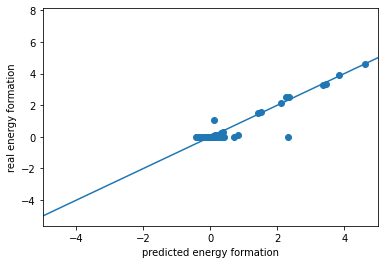

In [24]:
Yen_soap_predict = Kmodel_en.predict(X_soap_test)
plt.scatter(Yen_soap_predict, Yen_soap_test)
plt.plot([-5, 5], [-5, 5])
plt.xlabel("predicted energy formation")
plt.ylabel("real energy formation")
plt.xlim([-5, 5])
print(Kmodel_en.score(X_soap_test, Yen_soap_test))

0.9787020679407162


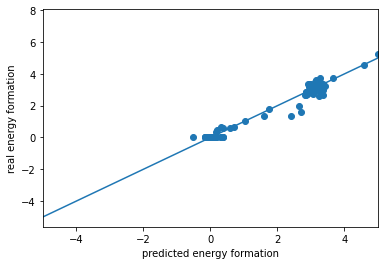

In [26]:
Yen_soap_predict = Kmodel_en.predict(X_soap_test)
plt.scatter(Yen_soap_predict, Yen_soap_test)
plt.plot([-5, 5], [-5, 5])
plt.xlabel("predicted energy formation")
plt.ylabel("real energy formation")
plt.xlim([-5, 5])
print(Kmodel_en.score(X_soap_test, Yen_soap_test))

### MLP avec soap:

In [41]:
from sklearn.neural_network import MLPRegressor

MLPR = MLPRegressor(
    hidden_layer_sizes=(1048, 1048, 256, 128, 64),
    shuffle=True,
    batch_size=1000,
    verbose=True,
    learning_rate="adaptive",
)
MLPR.fit(X_soap_train, Yen_soap_train)

Iteration 1, loss = 16.42921589
Iteration 2, loss = 0.93137460
Iteration 3, loss = 0.23683949
Iteration 4, loss = 0.12571710
Iteration 5, loss = 0.07962856
Iteration 6, loss = 0.06324236
Iteration 7, loss = 0.05498389
Iteration 8, loss = 0.05536145
Iteration 9, loss = 0.04866803
Iteration 10, loss = 0.06816094
Iteration 11, loss = 0.09101354
Iteration 12, loss = 0.07711089
Iteration 13, loss = 0.04514089
Iteration 14, loss = 0.03570417
Iteration 15, loss = 0.03119045
Iteration 16, loss = 0.03949656
Iteration 17, loss = 0.04719369
Iteration 18, loss = 0.13817567
Iteration 19, loss = 0.10459490
Iteration 20, loss = 0.08053177
Iteration 21, loss = 0.05943683
Iteration 22, loss = 0.06689448
Iteration 23, loss = 0.09338501
Iteration 24, loss = 0.17160259
Iteration 25, loss = 0.15183261
Iteration 26, loss = 0.05632625
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(batch_size=1000, hidden_layer_sizes=(1048, 1048, 256, 128, 64),
             learning_rate='adaptive', verbose=True)

0.41360677342184393


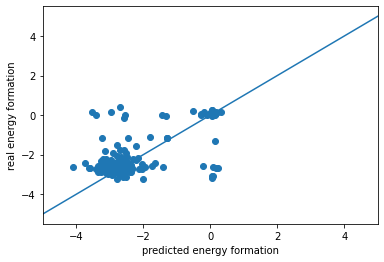

In [49]:
MYen_soap_predict = MLPR.predict(X_soap_test)
plt.scatter(MYen_soap_predict, Yen_soap_test)
plt.plot([-5, 5], [-5, 5])
plt.xlabel("predicted energy formation")
plt.ylabel("real energy formation")
plt.xlim([-5, 5])
print(MLPR.score(X_soap_test, Yen_soap_test))

### NN avec soap:

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model_5 = keras.Sequential(
    [
        layers.Input(X_soap_train.shape[1],),
        layers.Dense(1048, activation="relu"),
        layers.Dense(1048, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1),
    ]
)

model_5.compile(loss="mean_absolute_error", optimizer=tf.keras.optimizers.Adam(0.001))
print(model.summary())


history = model_5.fit(
    np.array(X_soap_train[:2000]), np.array(Yen_soap_train[:2000]), verbose=1, epochs=20
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1048)              126389848 
                                                                 
 dense_1 (Dense)             (None, 1048)              1099352   
                                                                 
 dense_2 (Dense)             (None, 256)               268544    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 127,798,961
Trainable params: 127,798,961


In [8]:
loss = history.history["loss"][:20]

In [9]:
# Entrainer le modèle en des paquets loss = history.history["loss"][:20]
for i in range(2, 18, 2):
    history = model_5.fit(
        np.array(X_soap_train[i * 1000 : i * 1000 + 2000,]),
        np.array(Yen_soap_train[i * 1000 : i * 1000 + 2000]),
        verbose=1,
        epochs=20,
    )
    loss = loss + history.history["loss"][:20]

Epoch 1/20
63/63 [==============================] - 40s 642ms/step - loss: 0.3838
Epoch 2/20
63/63 [==============================] - 33s 526ms/step - loss: 0.4063
Epoch 3/20
63/63 [==============================] - 36s 578ms/step - loss: 0.3678
Epoch 4/20
63/63 [==============================] - 35s 553ms/step - loss: 0.3403
Epoch 5/20
63/63 [==============================] - 36s 576ms/step - loss: 0.2453
Epoch 6/20
63/63 [==============================] - 39s 619ms/step - loss: 0.3012
Epoch 7/20
63/63 [==============================] - 38s 610ms/step - loss: 0.2471
Epoch 8/20
63/63 [==============================] - 37s 583ms/step - loss: 0.2506
Epoch 9/20
63/63 [==============================] - 44s 696ms/step - loss: 0.2326
Epoch 10/20
63/63 [==============================] - 36s 579ms/step - loss: 0.2592
Epoch 11/20
63/63 [==============================] - 38s 597ms/step - loss: 0.3050
Epoch 12/20
63/63 [==============================] - 33s 523ms/step - loss: 0.1741
Epoch 13/20
6

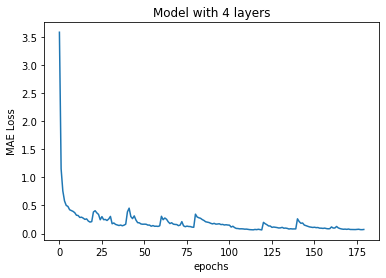

In [10]:
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("epochs")
plt.ylabel("MAE Loss")
plt.title("Model with 4 layers")
plt.savefig("Loss_nn_4.png")

(-5.0, 5.0)

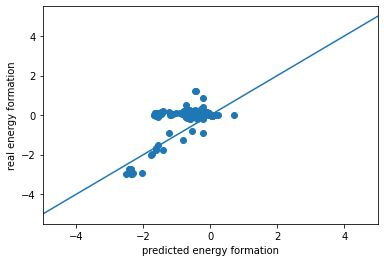

In [35]:
MYen_soap_predict = model_5.predict(X_soap_test)
plt.scatter(MYen_soap_predict, Yen_soap_test)
plt.plot([-5, 5], [-5, 5])
plt.xlabel("predicted energy formation")
plt.ylabel("real energy formation")

plt.xlim([-5, 5])

In [29]:
# Sauvegarder le model
model.save("NN_soap_relu_real_More_layers")

INFO:tensorflow:Assets written to: NN_soap_relu_real_More_layers\assets
